In [1]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(8, 5)})

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#import datasets
covid = pd.read_csv("covid.csv")
happiness = pd.read_csv("happiness.csv")

In [3]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
#merge all datasets
covid_happiness = pd.merge(covid, happiness, left_on = "location", right_on = "Country name").drop("location", axis = 1)

order = [0,58,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
        40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77]
covid_happiness = covid_happiness[covid_happiness.columns[order]]

covid_happiness.head()

,iso_code,Country name,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,AFG,Afghanistan,Asia,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
1,AFG,Afghanistan,Asia,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
2,AFG,Afghanistan,Asia,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
3,AFG,Afghanistan,Asia,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
4,AFG,Afghanistan,Asia,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236


In [6]:
#lowest happiness
happiness.sort_values(by = ["Ladder score"]).iloc[:5]
l1 = covid_happiness.loc[covid_happiness["Country name"] == "Afghanistan"]
l2 = covid_happiness.loc[covid_happiness["Country name"] == "South Sudan"]
l3 = covid_happiness.loc[covid_happiness["Country name"] == "Zimbabwe"]
l4 = covid_happiness.loc[covid_happiness["Country name"] == "Rwanda"]
l5 = covid_happiness.loc[covid_happiness["Country name"] == "Central African Republic"]
l_countries = pd.concat([l1, l2, l3, l4, l5], ignore_index = True)

#highest happiness
happiness.sort_values(by = ["Ladder score"]).iloc[-5:]
h1 = covid_happiness.loc[covid_happiness["Country name"] == "Norway"]
h2 = covid_happiness.loc[covid_happiness["Country name"] == "Iceland"]
h3 = covid_happiness.loc[covid_happiness["Country name"] == "Switzerland"]
h4 = covid_happiness.loc[covid_happiness["Country name"] == "Denmark"]
h5 = covid_happiness.loc[covid_happiness["Country name"] == "Finland"]
h_countries = pd.concat([h1, h2, h3, h4, h5], ignore_index = True)

In [7]:
#countries of interest
US = covid_happiness.loc[covid_happiness["Country name"] == "United States"]
SA = covid_happiness.loc[covid_happiness["Country name"] == "South Africa"]
UK = covid_happiness.loc[covid_happiness["Country name"] == "United Kingdom"]
i_countries = pd.concat([US, SA, UK], ignore_index = True)

In [8]:
#sorting into needed data
gen = covid_happiness.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

In [9]:
#general cases linear regression
data = gen[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
cases_target = gen["total_cases_per_million"].values

cases_model = LinearRegression()
cases_model.fit(X = data, y = cases_target)

print(cases_model.coef_)

gen["pred_total_cases_per_million"] = cases_model.predict(data)
gen[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(gen["total_cases_per_million"].values, gen["pred_total_cases_per_million"].values),
     "r^2:", r2_score(gen["total_cases_per_million"].values, gen["pred_total_cases_per_million"].values))

[ 1.31753845e+03  6.88928166e+02 -4.78152633e+00  2.93648028e-01]
MSE: 533062441.5987273 r^2: 0.43257254126763245


<AxesSubplot:xlabel='Median Age', ylabel='Total COVID-19 Cases'>

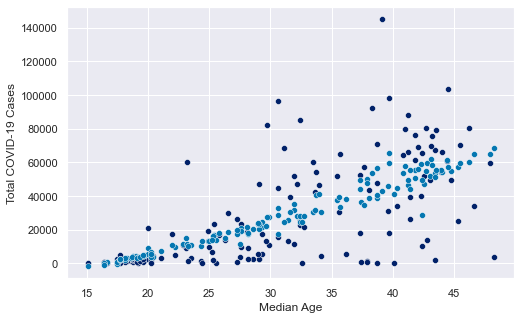

In [10]:
sns.scatterplot(data = gen, x = "median_age", y = "total_cases_per_million", color = "#012169").set(xlabel = "Median Age", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "median_age", y = "pred_total_cases_per_million", color = "#0577B1")

<AxesSubplot:xlabel='% of Population Aged 65 or Older', ylabel='Total COVID-19 Cases'>

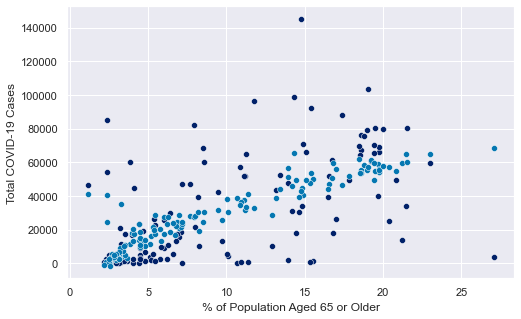

In [11]:
sns.scatterplot(data = gen, x = "aged_65_older", y = "total_cases_per_million", color = "#012169").set(xlabel = "% of Population Aged 65 or Older", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "aged_65_older", y = "pred_total_cases_per_million", color = "#0577B1")

<AxesSubplot:xlabel='Population Density', ylabel='Total COVID-19 Cases'>

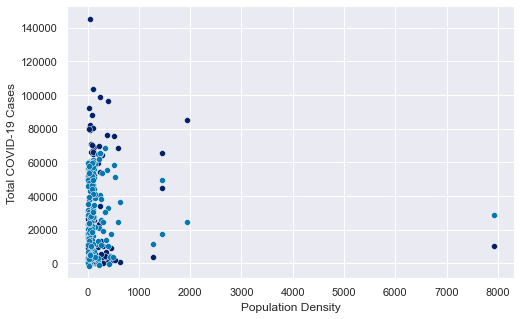

In [12]:
sns.scatterplot(data = gen, x = "population_density", y = "total_cases_per_million", color = "#012169").set(xlabel = "Population Density", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "population_density", y = "pred_total_cases_per_million", color = "#0577B1")

<AxesSubplot:xlabel='GDP per Capita', ylabel='Total COVID-19 Cases'>

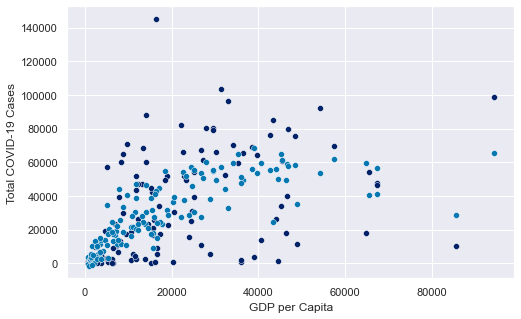

In [13]:
sns.scatterplot(data = gen, x = "gdp_per_capita", y = "total_cases_per_million", color = "#012169").set(xlabel = "GDP per Capita", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "gdp_per_capita", y = "pred_total_cases_per_million", color = "#0577B1")

In [14]:
#transformed general
data = gen[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
poly_data = PolynomialFeatures(3, include_bias = False).fit_transform(data)
cases_target = gen["total_cases_per_million"].values

cubic_model = LinearRegression()
cubic_model.fit(X = poly_data, y = cases_target)

gen["cubic_pred_total_cases_per_million"] = cubic_model.predict(poly_data)

print(cubic_model.coef_)
print("MSE:", mean_squared_error(gen["total_cases_per_million"].values, gen["cubic_pred_total_cases_per_million"].values),
     "r^2:", r2_score(gen["total_cases_per_million"].values, gen["cubic_pred_total_cases_per_million"].values))

[-4.29401538e+04  1.97489623e+01 -1.93797010e+02  1.39045653e+01
  2.09463226e+03 -4.14116673e+02  3.05659448e+01 -1.16810190e+00
 -6.31446855e+02 -4.51046828e+01  1.76876530e-01  5.42102179e-02
  1.30941173e-02  2.24393299e-04 -3.47783638e+01  3.45958094e+01
 -1.21466589e+00  2.46158019e-02  7.59291580e+00  2.63892183e+00
 -2.38593707e-02  4.34162685e-04  1.39286814e-04 -7.97074380e-06
 -3.73874051e+01 -1.63287174e+00  2.40754967e-02 -1.98512473e-03
 -3.47354219e-05  2.14931365e-06  3.00891756e-05 -3.37527256e-06
 -1.45217675e-07  6.53943307e-10]
MSE: 294820857.1757056 r^2: 0.6861728819858609


<AxesSubplot:xlabel='Median Age', ylabel='Total COVID-19 Cases'>

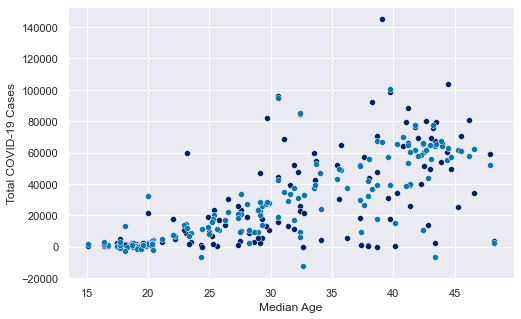

In [15]:
sns.scatterplot(data = gen, x = "median_age", y = "total_cases_per_million", color = "#012169").set(xlabel = "Median Age", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "median_age", y = "cubic_pred_total_cases_per_million", color = "#0577B1")

<AxesSubplot:xlabel='% of Population Aged 65 or Older', ylabel='Total COVID-19 Cases'>

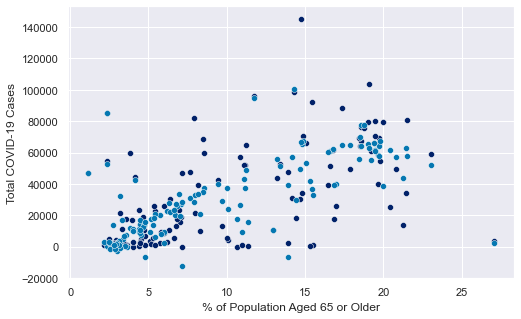

In [16]:
sns.scatterplot(data = gen, x = "aged_65_older", y = "total_cases_per_million", color = "#012169").set(xlabel = "% of Population Aged 65 or Older", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "aged_65_older", y = "cubic_pred_total_cases_per_million", color = "#0577B1")

<AxesSubplot:xlabel='Population Density', ylabel='Total COVID-19 Cases'>

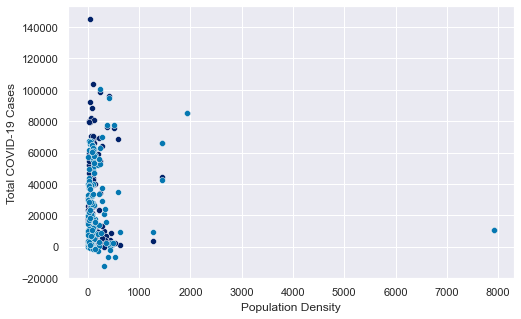

In [17]:
sns.scatterplot(data = gen, x = "population_density", y = "total_cases_per_million", color = "#012169").set(xlabel = "Population Density", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "population_density", y = "cubic_pred_total_cases_per_million", color = "#0577B1")

<AxesSubplot:xlabel='GDP per Capita', ylabel='Total COVID-19 Cases'>

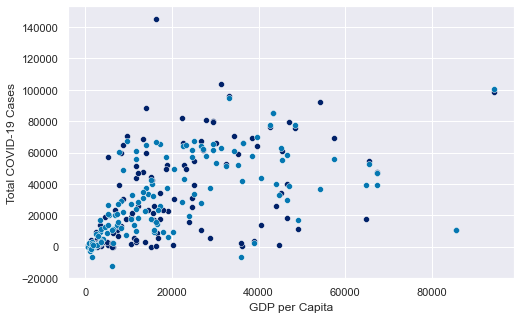

In [18]:
sns.scatterplot(data = gen, x = "gdp_per_capita", y = "total_cases_per_million", color = "#012169").set(xlabel = "GDP per Capita", 
                                                                                 ylabel = "Total COVID-19 Cases")
sns.scatterplot(data = gen, x = "gdp_per_capita", y = "cubic_pred_total_cases_per_million", color = "#0577B1")

In [19]:
#low linear regression
l = l_countries.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

l_data = l[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
l_target = l["total_cases_per_million"].values

l_model = LinearRegression()
l_model.fit(X = l_data, y = l_target)

print(l_model.coef_)

l["pred_total_cases_per_million"] = l_model.predict(l_data)
l[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(l["total_cases_per_million"].values, l["pred_total_cases_per_million"].values),
     "r^2:", r2_score(l["total_cases_per_million"].values, l["pred_total_cases_per_million"].values))

[ 8.74738096e+02  2.93035765e+02 -3.17003859e+00  5.09938862e-01]
MSE: 5.785611396925583e-22 r^2: 1.0


In [20]:
#transformed low
l_data = l[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
l_poly_data = PolynomialFeatures(3, include_bias = False).fit_transform(l_data)
l_target = l["total_cases_per_million"].values

l_cubic_model = LinearRegression()
l_cubic_model.fit(X = l_poly_data, y = l_target)

l["cubic_pred_total_cases_per_million"] = l_cubic_model.predict(l_poly_data)

print(l_cubic_model.coef_)
print("MSE:", mean_squared_error(l["total_cases_per_million"].values, l["cubic_pred_total_cases_per_million"].values),
     "r^2:", r2_score(l["total_cases_per_million"].values, l["cubic_pred_total_cases_per_million"].values))

[ 5.56598007e-12  2.48146802e-12 -3.10979236e-11 -5.98393305e-10
  2.13227264e-10  6.16606067e-11 -1.89291427e-10 -1.99659447e-10
  1.43104733e-11  2.05526201e-11  1.83999615e-09  3.50968068e-08
 -3.73403304e-08 -8.05313695e-07  6.12768883e-09  1.45286087e-09
  4.21687543e-09  2.11184505e-07  3.09160650e-10  1.50195636e-09
  6.49926287e-08  7.39162142e-07  4.04809370e-08  6.00528141e-06
  6.25389049e-11  3.49635973e-10  1.49101637e-08  1.10713001e-07
  8.36093633e-08  3.46796108e-06  2.15411519e-05  6.64740794e-05
 -2.13732763e-05  6.09842577e-07]
MSE: 2.1648092112337003e-21 r^2: 1.0


In [21]:
#high linear regression
h = h_countries.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

h_data = h[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
h_target = h["total_cases_per_million"].values

h_model = LinearRegression()
h_model.fit(X = h_data, y = h_target)

print(h_model.coef_)

h["pred_total_cases_per_million"] = h_model.predict(h_data)
h[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(h["total_cases_per_million"].values, h["pred_total_cases_per_million"].values),
     "r^2:", r2_score(h["total_cases_per_million"].values, h["pred_total_cases_per_million"].values))

[ 1.05507642e+04 -9.68218249e+03  1.49002526e+02 -2.34182595e-01]
MSE: 2.946627459024363e-16 r^2: 1.0


In [22]:
#transformed high
h_data = h[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
h_poly_data = PolynomialFeatures(3, include_bias = False).fit_transform(h_data)
h_target = h["total_cases_per_million"].values

h_cubic_model = LinearRegression()
h_cubic_model.fit(X = h_poly_data, y = h_target)

h["cubic_pred_total_cases_per_million"] = h_cubic_model.predict(h_poly_data)

print(h_cubic_model.coef_)
print("MSE:", mean_squared_error(h["total_cases_per_million"].values, h["cubic_pred_total_cases_per_million"].values),
     "r^2:", r2_score(h["total_cases_per_million"].values, h["cubic_pred_total_cases_per_million"].values))

[-2.27824824e-14 -1.98558804e-14  1.16385328e-12  2.94396262e-11
 -1.94143163e-12 -1.28548027e-12  4.69922757e-11  4.01174841e-11
 -8.36305114e-13  2.53711880e-11 -1.15827397e-10  3.21012263e-12
  3.02744280e-08  1.35964723e-06 -1.23518118e-10 -7.33268217e-11
  1.89157000e-09 -4.93208675e-08 -4.40933642e-11  1.03154586e-09
 -2.79011965e-08 -2.95322178e-10  1.15440995e-06 -8.28532486e-06
 -2.63633105e-11  5.43370661e-10 -1.81283718e-08  7.14310441e-10
  7.45960406e-07  3.77780435e-06 -4.03339917e-08 -5.52782459e-06
  2.54390421e-07  3.19007689e-09]
MSE: 5.647062780226014e-20 r^2: 1.0


In [23]:
#interested linear regression
i = i_countries.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

i_data = i[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
i_target = i["total_cases_per_million"].values

i_model = LinearRegression()
i_model.fit(X = i_data, y = i_target)

print(i_model.coef_)

i["pred_total_cases_per_million"] = i_model.predict(i_data)
i[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(i["total_cases_per_million"].values, i["pred_total_cases_per_million"].values),
     "r^2:", r2_score(i["total_cases_per_million"].values, i["pred_total_cases_per_million"].values))

[ -0.58192446  -0.60810152 -21.59013434   1.56673626]
MSE: 3.970466940254533e-23 r^2: 1.0


In [24]:
#transformed interested
i_data = i[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
i_poly_data = PolynomialFeatures(3, include_bias = False).fit_transform(i_data)
i_target = i["total_cases_per_million"].values

i_cubic_model = LinearRegression()
i_cubic_model.fit(X = i_poly_data, y = i_target)

i["cubic_pred_total_cases_per_million"] = i_cubic_model.predict(i_poly_data)

print(i_cubic_model.coef_)
print("MSE:", mean_squared_error(i["total_cases_per_million"].values, i["cubic_pred_total_cases_per_million"].values),
     "r^2:", r2_score(i["total_cases_per_million"].values, i["cubic_pred_total_cases_per_million"].values))

[7.79437741e-19 7.81544418e-19 1.94128781e-17 9.46670819e-16
 5.39293688e-17 3.68690726e-17 8.27547367e-16 5.16147187e-14
 1.96669449e-17 3.94881361e-16 3.13796462e-14 6.11918146e-15
 8.21241837e-13 2.94985174e-11 2.83950171e-15 1.65407668e-15
 3.47650442e-14 2.50911435e-12 8.41677542e-16 1.63300899e-14
 1.39419025e-12 2.51290129e-13 3.40647903e-11 1.54848242e-09
 4.07632274e-16 7.53753037e-15 7.10297432e-13 1.14924444e-13
 1.57933523e-11 9.46486079e-10 1.70524943e-12 2.45759596e-10
 3.25517223e-08 3.96824077e-10]
MSE: 9.26442286059391e-23 r^2: 1.0


In [25]:
#importing race in interested
US_race = pd.read_csv("US_race.csv")
US_race["Country name"] = "United States"
UK_race = pd.read_csv("UK_race.csv")
UK_race["Country name"] = "United Kingdom"
SA_race = pd.read_csv("SA_race.csv")
SA_race["Country name"] = "South Africa"
race = pd.concat([US_race, UK_race, SA_race], ignore_index=True)

i_race = pd.merge(i, race, on = "Country name")
i_race.head()

,Country name,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,pred_total_cases_per_million,cubic_pred_total_cases_per_million,White,Black,Asian,Mixed
0,South Africa,1548157.0,21980.0,19042.000,52846.0,844.0,577.571,26103.375,370.603,321.066,...,0.434782,0.126407,0.059502,1.625117,26103.375,26103.375,4444000.0,47454000.0,1451000.0,5080000.0
1,United Kingdom,4359982.0,68192.0,59828.571,126955.0,1826.0,1253.000,64225.050,1004.507,881.309,...,0.525169,0.373433,0.322602,2.236722,64225.050,64225.050,54953440.0,1890600.0,2646840.0,1260400.0
2,United States,30460730.0,300308.0,250764.857,552072.0,4476.0,3428.000,92025.639,907.268,757.592,...,0.534608,0.298143,0.152285,2.344125,92025.639,92025.639,250520000.0,44080000.0,19500000.0,9140000.0


In [26]:
#i_race linear
i_data = i_race[["median_age", "aged_65_older", "population_density", "gdp_per_capita", "White", "Black", "Asian", "Mixed"]].values
i_target = i_race["total_cases_per_million"].values

i_model = LinearRegression()
i_model.fit(X = i_data, y = i_target)

print(i_model.coef_)

i_race["pred_total_cases_per_million"] = i_model.predict(i_data)
i_race[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(i_race["total_cases_per_million"].values, i_race["pred_total_cases_per_million"].values),
     "r^2:", r2_score(i_race["total_cases_per_million"].values, i_race["pred_total_cases_per_million"].values))

[ 1.46630939e-10  1.44008335e-10  2.72948172e-09  2.70897472e-07
  2.62109541e-04 -5.42077895e-04 -1.08835412e-05 -5.15144119e-05]
MSE: 7.499770887147451e-23 r^2: 1.0


In [27]:
#tranformed i_race
i_data = i_race[["median_age", "aged_65_older", "population_density", "gdp_per_capita", "White", "Black", "Asian", "Mixed"]].values
i_poly_data = PolynomialFeatures(3, include_bias = False).fit_transform(i_data)
i_target = i_race["total_cases_per_million"].values

i_cubic_model = LinearRegression()
i_cubic_model.fit(X = i_poly_data, y = i_target)

i_race["cubic_pred_total_cases_per_million"] = i_cubic_model.predict(i_poly_data)

print(i_cubic_model.coef_)
print("MSE:", mean_squared_error(i_race["total_cases_per_million"].values, i_race["cubic_pred_total_cases_per_million"].values),
     "r^2:", r2_score(i_race["total_cases_per_million"].values, i_race["cubic_pred_total_cases_per_million"].values))

[ 7.52316385e-36  9.22014720e-45  6.86184562e-40  8.19839101e-38
  1.45607696e-34 -1.38079179e-34  3.07105671e-36 -1.17089345e-35
  2.76595710e-39  1.83509853e-39  2.98938567e-38  3.84738784e-36
  6.14017557e-33 -3.70708323e-33  1.85604161e-34 -2.71145371e-34
  9.46827138e-40  1.45583723e-38  2.00947943e-36  2.89589508e-33
 -6.76028321e-34  1.16110024e-34 -1.50519985e-35  2.19258846e-37
  3.11161040e-35  4.45830497e-32 -5.14397683e-33  1.96558781e-33
  3.20131249e-34  4.24842702e-33  6.04308023e-30 -1.59712760e-30
  2.33001728e-31 -5.07987242e-32  7.16720491e-27 -6.57944842e-28
  2.71376505e-28  7.17973236e-29 -6.80907966e-27 -2.17989038e-28
 -7.28852325e-28  3.22034120e-30 -1.74971569e-29 -7.52241867e-29
  1.43168102e-37  8.08299438e-38  1.27150197e-36  1.70736060e-34
  2.56174369e-31 -9.86169369e-32  9.23548620e-33 -5.41538227e-33
  3.98062062e-38  6.04149564e-37  8.47138446e-35  1.19412153e-31
 -1.72523273e-32  5.07467055e-33  4.96920460e-34  9.03444731e-36
  1.29298181e-33  1.82809